# 1 Dimensional Gaussian based Kalman Filter

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
n = 50
true_value = 10
process_noise_std = 0.1
measurement_noise_std = 1.0

In [9]:
def gaussian_multiply(mu1, var1, mu2, var2):
    precision1 = 1 / var1
    precision2 = 1 / var2
    mu = (mu1 * precision2 + mu2 * precision1) / (precision1 + precision2)
    var = 1 / (precision1 + precision2)
    return mu, var

def gaussian_add(mu1, var1, mu2, var2):
    return mu1 + mu2, var1 + var2

In [15]:
def kalman_filter_gaussian_1d(measurements, prior_mu=0., prior_var=1., process_mu=0., process_var=0.01,measurement_var=1.):
    mu = prior_mu
    var = prior_var
    estimates = []

    for z in measurements:
        # prior = previous posterior + process noise
        mu, var = gaussian_add(mu, var, process_mu, process_var)

        # posterior = prior * measurement
        mu, var = gaussian_multiply(mu, var, z, measurement_var)
        estimates.append(mu)

    return estimates

In [13]:
np.random.seed(0)
n = 100
true_value = 5
process_noise_std = 0.1
measurement_noise_std = 1.0

true_values = [true_value + np.random.normal(0, process_noise_std) for _ in range(n)]
measurements = [x + np.random.normal(0, measurement_noise_std) for x in true_values]

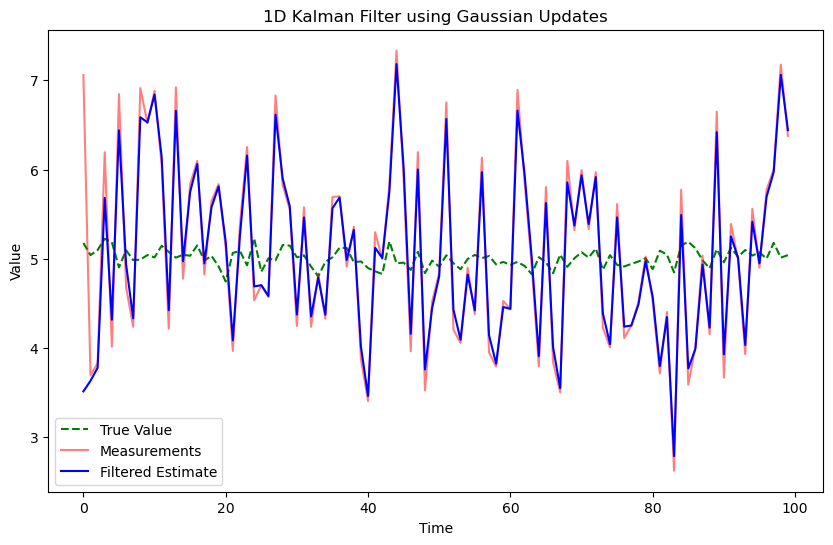

In [14]:
estimates = kalman_filter_gaussian_1d(measurements, prior_mu=0, prior_var=1, process_mu=0, process_var=process_noise_std**2,measurement_var=measurement_noise_std**2)

plt.figure(figsize=(10, 6))
plt.plot(true_values, label="True Value", linestyle='--', color='green')
plt.plot(measurements, label="Measurements", alpha=0.5, color='red')
plt.plot(estimates, label="Filtered Estimate", color='blue')
plt.title("1D Kalman Filter using Gaussian Updates")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.show()